In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
x= dataset.iloc[:,[3,4]].values


11
Estimated number of clusters: 11


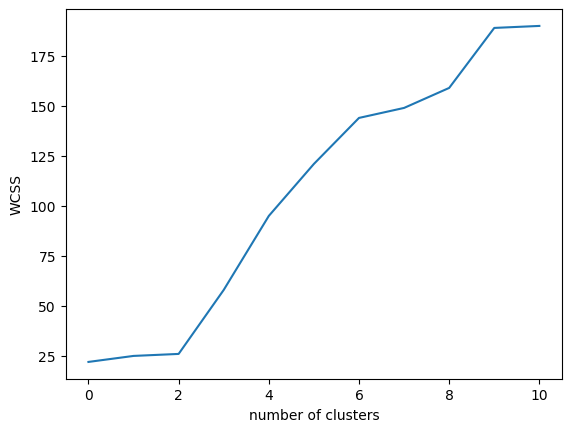

In [27]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics.cluster import homogeneity_score

ap = AffinityPropagation(random_state=5).fit(x)
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
n_clusters = len(cluster_centers_indices)
print(n_clusters)
print("Estimated number of clusters: %d" % n_clusters)


plt.plot(range(0,11),cluster_centers_indices)
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
from itertools import cycle
from sklearn import metrics 
 
p = ap.predict(x)
print(p)

[ 2  1  0  1  2  1  0  1  0  1  0  1  0  1  0  1  2  1  2  1  2  1  0  1
  0  1  2  3  2  1  0  1  0  1  0  1  0  1  2  1  2  1  2  3  2  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  4  5  5  4
  4  4  5  4  5  4  4  4  4  5  4  4  5  4  4  4  5  5  4  4  5  4  5  4
  4  5  4  7  5  8  5  7  6  8  6  8  5  8  6  7  6  8  6  8  6  7  5  7
  6  7  5  8  6  7  6  7  6  8  6  7  6  8  6  8  5  7  6  7  6  8  6  7
 10  8  6  8  6  7  6  7  6  8 10  9 10  9 10  9 10  9 10  9 10  9 10  9
 10  9 10  9 10  9 10  9]


In [36]:
supervised = pd.DataFrame(dataset)
supervised['Cluster_Group'] = p
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,9
196,197,Female,45,126,28,10
197,198,Male,32,126,74,9
198,199,Male,32,137,18,10


/lib/python3.11/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


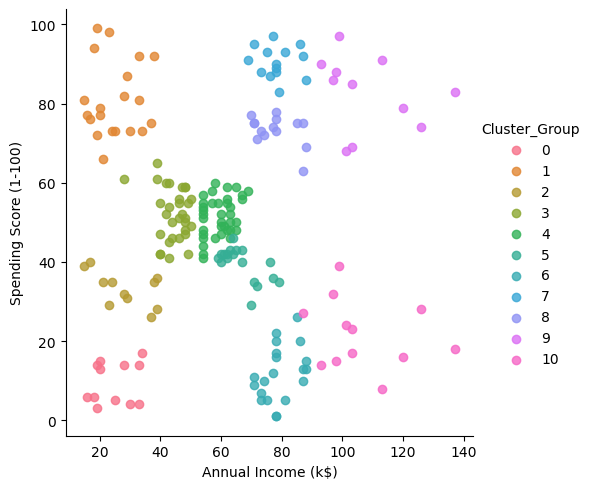

In [40]:
import seaborn as sns
facet = sns.lmplot(data = supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
                  fit_reg = False,legend = True,legend_out = True)

In [39]:
%pip install seaborn